In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp
from ulmo.plotting import gallery as ulmo_gallery

In [2]:
v98 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_98clear_std.parquet')
llc = ulmo_io.load_main_table('s3://llc/Tables/LLC_uniform144_r0.5.parquet')

Read main table: s3://viirs/Tables/VIIRS_all_98clear_std.parquet
Read main table: s3://llc/Tables/LLC_uniform144_r0.5.parquet


In [3]:
v98['DT'] = v98.T90 - v98.T10

In [4]:
llc['DT'] = llc.T90 - llc.T10

Median LL is 379.8913269042969.
Temperature scale is -2.321319580078125 to 1.9654464721679688.


/home/jovyan/ulmo/ulmo/plotting/gallery.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  return fig.tight_layout(rect=[0, 0, .9, 1])


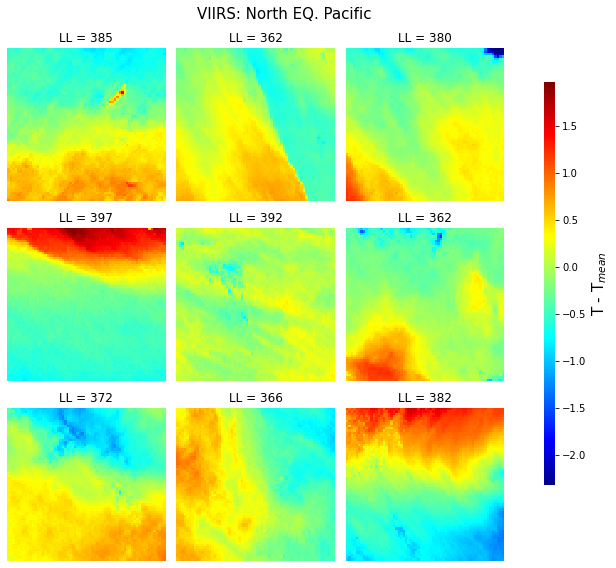

In [5]:
ulmo_gallery.gallery(tbl=v98, title='VIIRS: North EQ. Pacific')

Median LL is 790.4640808105469.
Temperature scale is -2.321319580078125 to 1.9654464721679688.


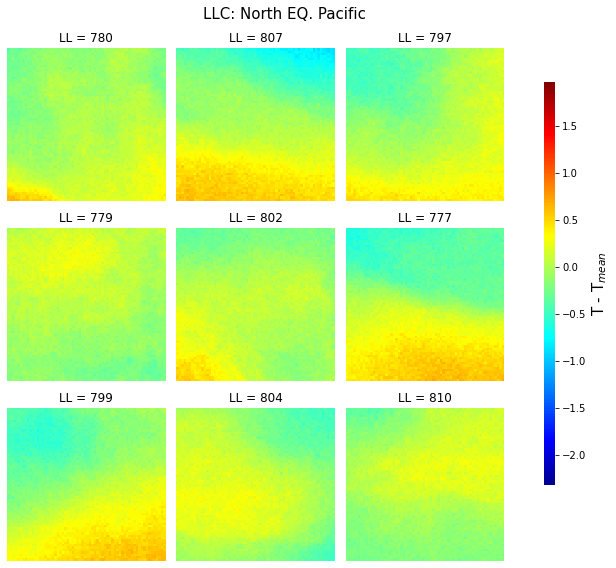

In [8]:
ulmo_gallery.gallery(tbl=llc, tmin=-2.321319580078125, tmax=1.9654464721679688, title='LLC: North EQ. Pacific')

Median LL is 505.50390625.
Temperature scale is -2.321319580078125 to 1.9654464721679688.


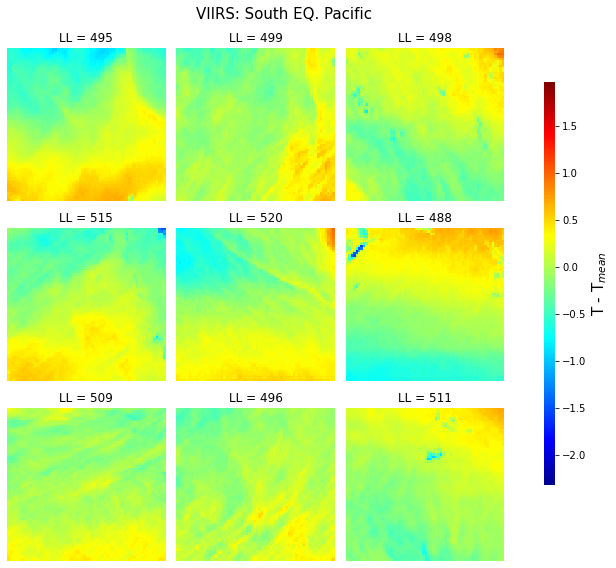

In [10]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-2, north=0, mid_lon=100, dlon=5, tmin=-2.321319580078125, tmax=1.9654464721679688, title='VIIRS: South EQ. Pacific')

Median LL is 739.8324890136719.
Temperature scale is -2.321319580078125 to 1.9654464721679688.


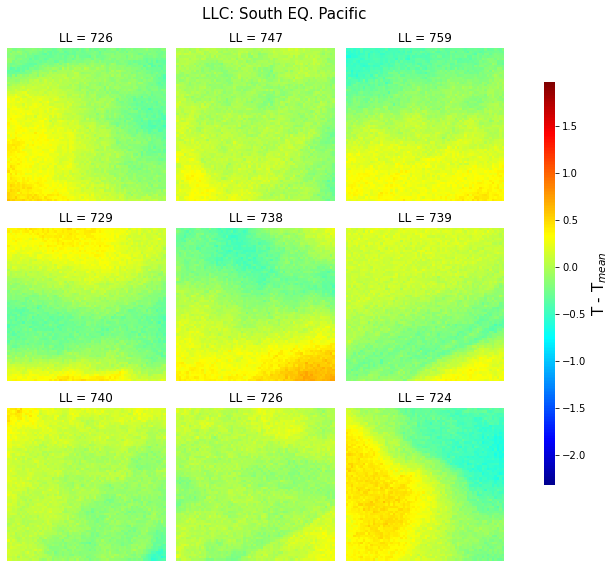

In [11]:
ulmo_gallery.gallery(tbl=llc, south=-2, north=0, tmin=-2.321319580078125, tmax=1.9654464721679688, title='LLC: South EQ. Pacific')

# Distributions

In [5]:
south=0
north=2
mid_lon=100
dlon=5

In [6]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_np = v98[ rect ]

In [7]:
rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_np = llc[ rect ]

In [8]:
south=-2
north=0
mid_lon=100
dlon=5

In [9]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_sp = v98[ rect ]

In [10]:
rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_sp = llc[ rect ]

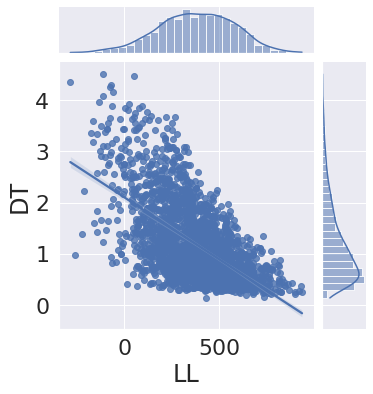

In [18]:
sns.set(font_scale = 2)

ax = sns.jointplot(x = viirs_np['LL'], y = viirs_np['DT'], kind = 'reg')


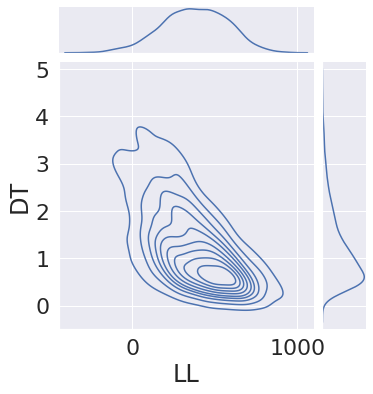

In [42]:
sns.set(font_scale = 2)

ax = sns.jointplot(x = viirs_np['LL'], y = viirs_np['DT'], kind = 'kde')


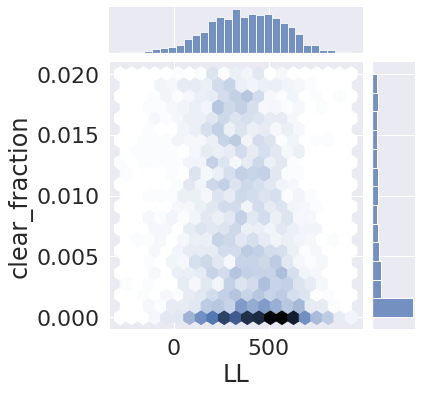

In [46]:
sns.set(font_scale = 2)

ax = sns.jointplot(x = viirs_np['LL'], y = viirs_np['clear_fraction'], kind = 'hex')

(2208, 18)

Text(0.5, 0.98, 'Above the Equator')

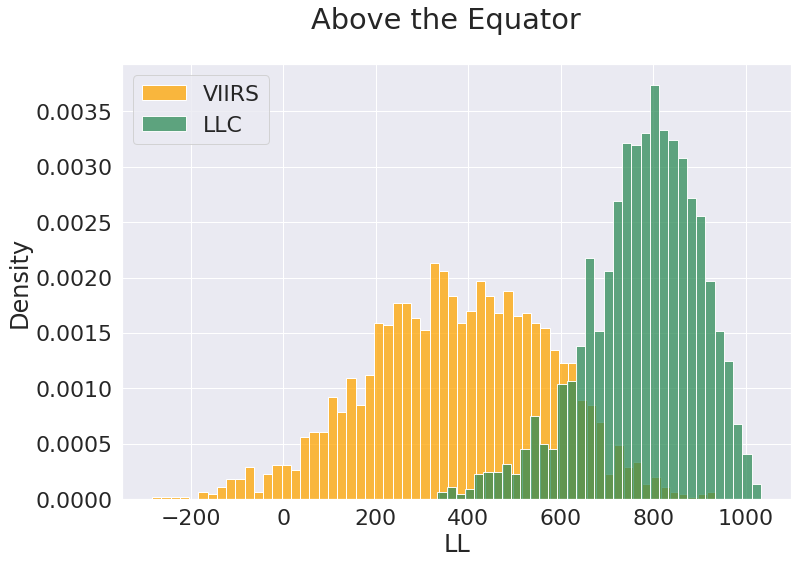

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_np, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('Above the Equator')

Text(0.5, 0.98, 'Above the Equator')

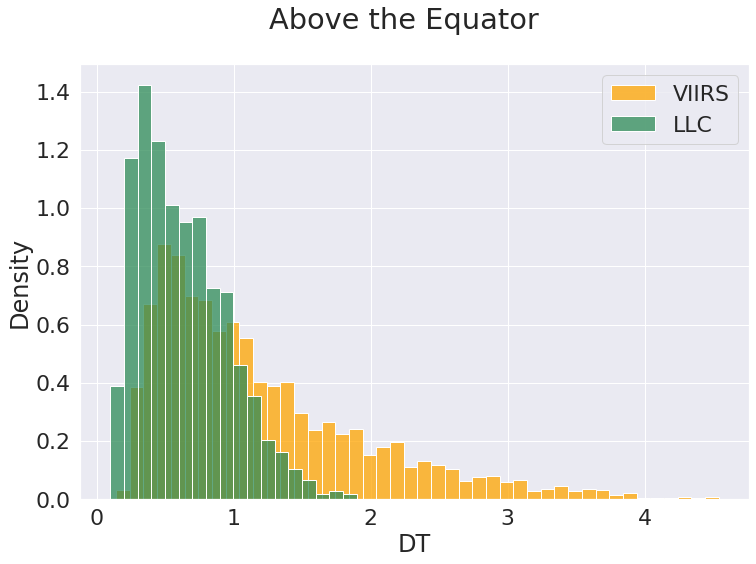

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_np, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('Above the Equator')

Text(0.5, 0.98, 'Below the Equator')

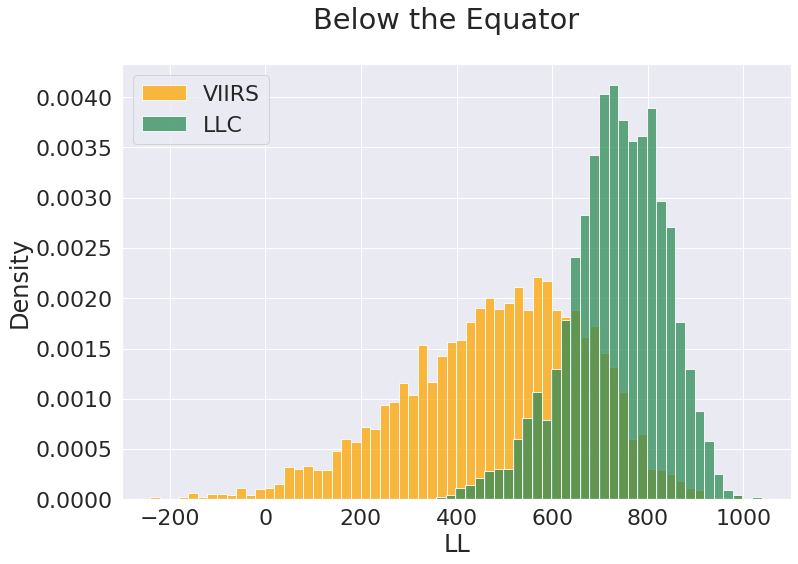

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_sp, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='LLC')
ax.set_xlim(-300, 1100)
                  
ax.legend()
fig.suptitle('Below the Equator')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_sp, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='LLC')
ax.set_xlim(0, 5)
                  
ax.legend()
fig.suptitle('Below the Equator')

Text(0.5, 0.98, 'Below the Equator')

Text(0.5, 0.98, 'VIIRS')

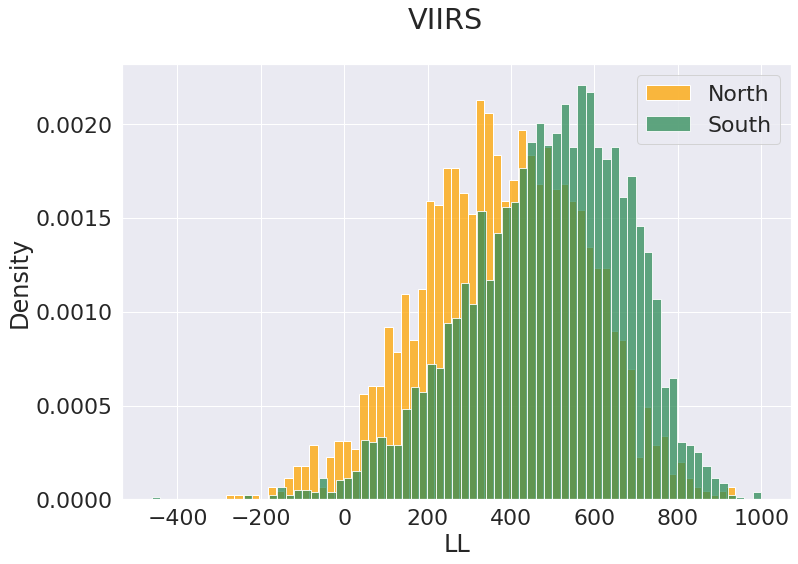

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = viirs_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('VIIRS')

Text(0.5, 0.98, 'VIIRS')

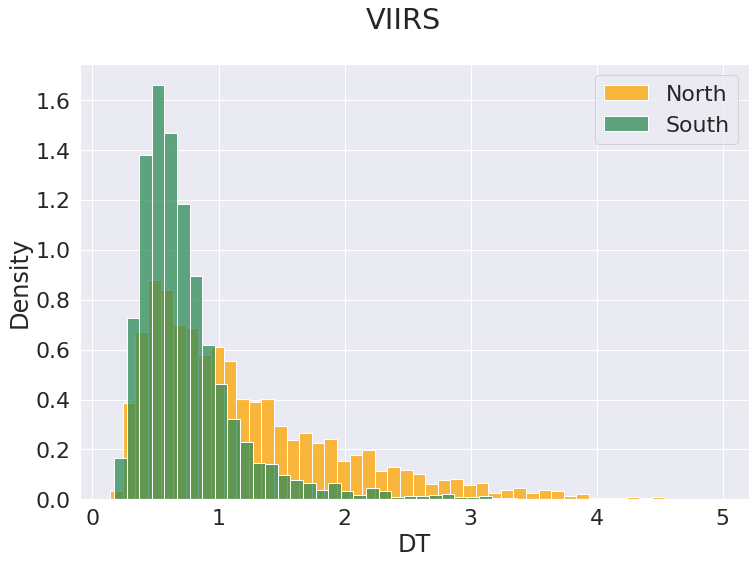

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = viirs_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('VIIRS')

Text(0.5, 0.98, 'LLC')

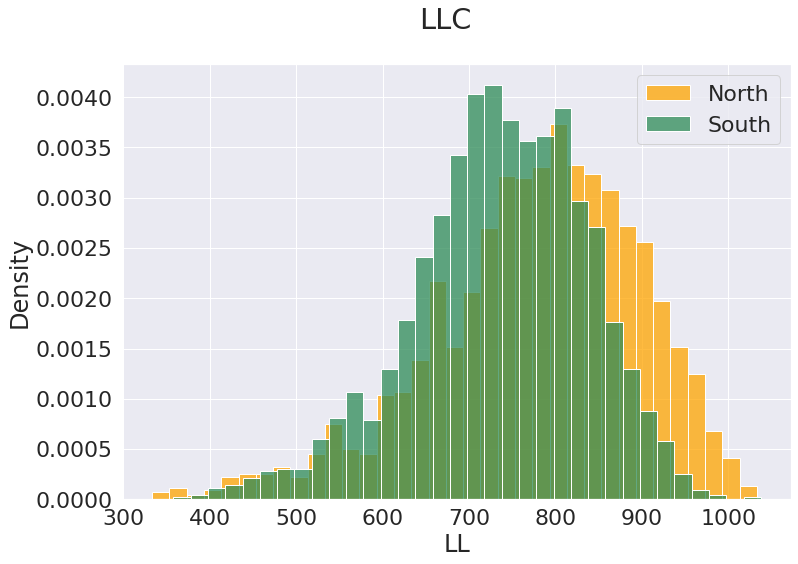

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = llc_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = llc_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('LLC')

Text(0.5, 0.98, 'LLC')

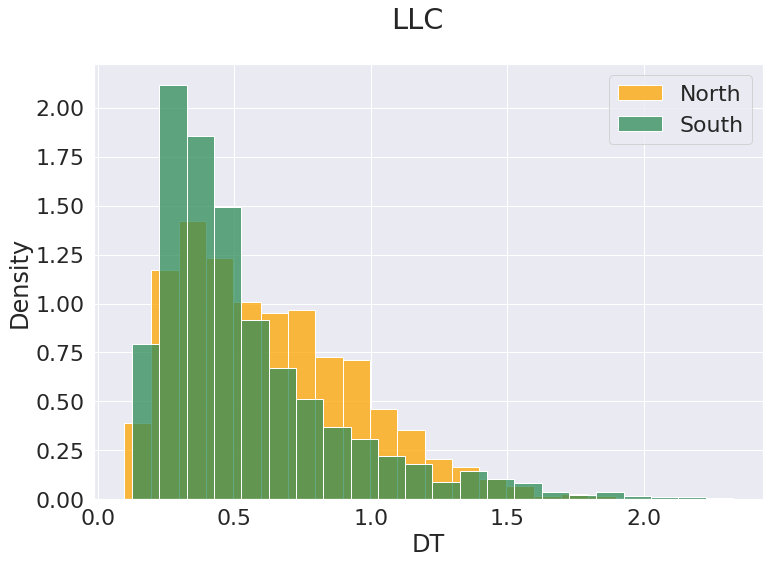

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = llc_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = llc_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('LLC')

# LLC Comparison

In [59]:
sns.set(font_scale = 1)

Median LL is 790.4640808105469.
Temperature scale is -0.97503662109375 to 0.8544101715087891.


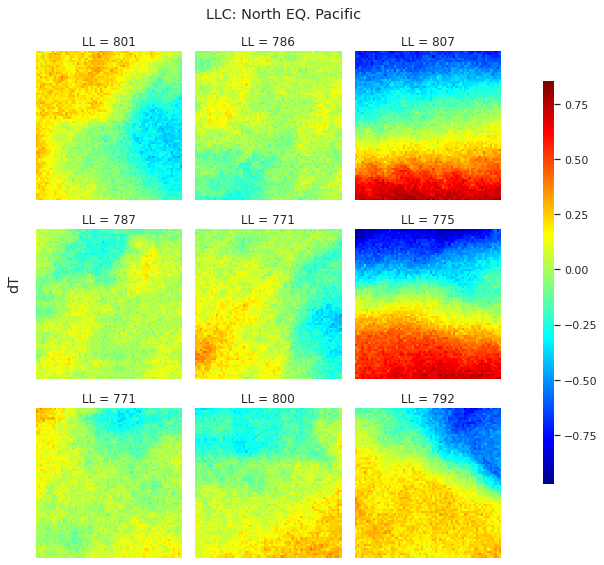

In [60]:
ulmo_gallery.gallery(tbl=llc, title='LLC: North EQ. Pacific')

Median LL is 739.8324890136719.
Temperature scale is -0.97503662109375 to 0.8544101715087891.


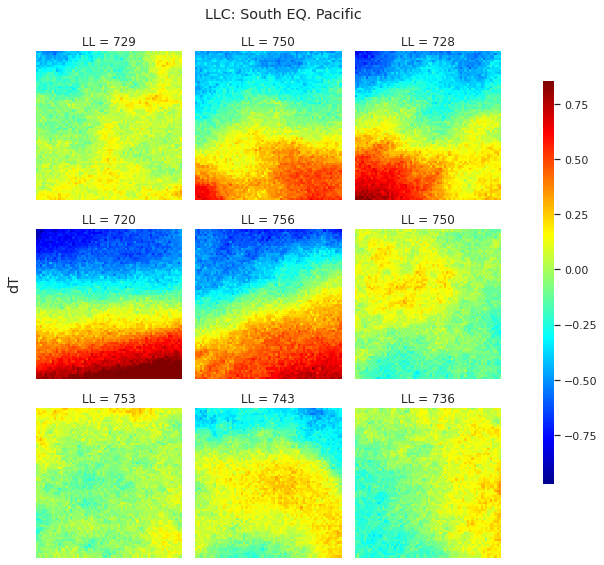

In [61]:
ulmo_gallery.gallery(tbl=llc, south=-2, north=0, tmin=-0.97503662109375, tmax=0.8544101715087891, title='LLC: South EQ. Pacific')

# VIIRS Comparison

Median LL is 379.8913269042969.
Temperature scale is -1.186056137084961 to 2.349224090576172.


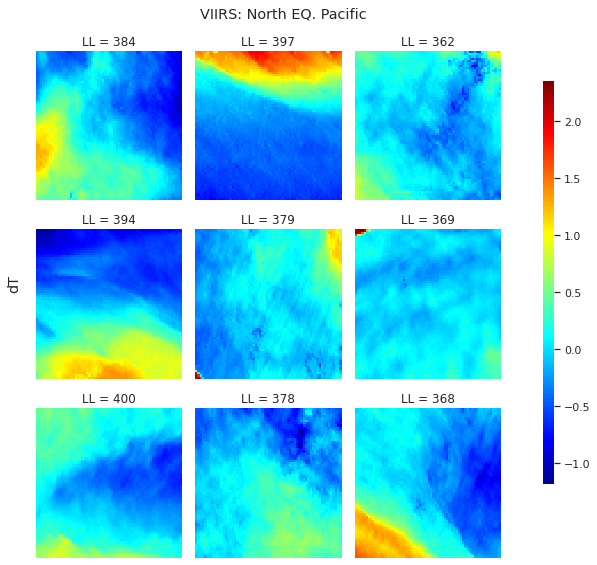

In [64]:
ulmo_gallery.gallery(tbl=v98, title='VIIRS: North EQ. Pacific')

Median LL is 505.50390625.
Temperature scale is -1.186056137084961 to 2.349224090576172.


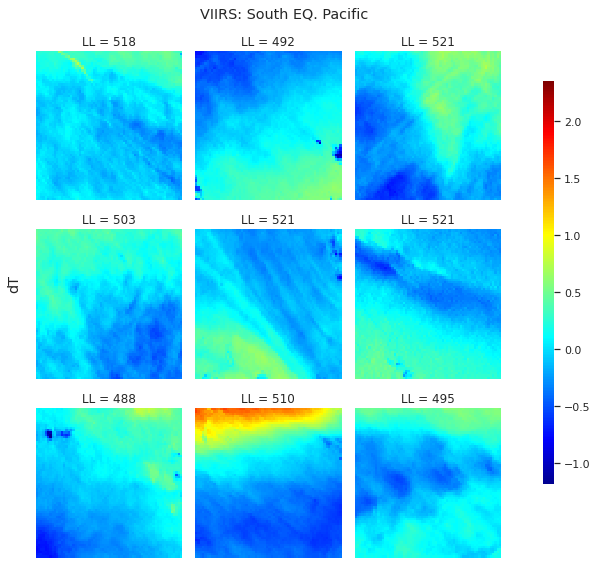

In [65]:
ulmo_gallery.gallery(tbl=v98, south = -2, north = 0, tmin=-1.186056137084961, tmax = 2.349224090576172, title='VIIRS: South EQ. Pacific')

In [47]:
tbl = viirs_sp[(viirs_sp.LL > 480) & (viirs_sp.LL < 510) ]
tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,...,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,MODIS_LL,DT
44097,s3://viirs/data/2012/073/20120313191000-OSPO-L...,4368,2592,-0.678313,-97.325760,0.014160,192,2012-03-13 19:10:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,430120,0,27.271328,26.380005,27.970001,27.579987,26.929993,482.496399,526.892090,0.649994
50687,s3://viirs/data/2012/079/20120319080000-OSPO-L...,3120,1632,-1.411893,-99.795006,0.001600,192,2012-03-19 08:00:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,611974,0,27.038548,26.290009,27.549988,27.309998,26.839996,509.236755,534.312988,0.470001
143160,s3://viirs/data/2012/196/20120714205000-OSPO-L...,720,576,-0.607439,-104.216644,0.014947,192,2012-07-14 20:50:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,959091,0,24.759632,23.070007,25.820007,25.350006,24.389984,498.745850,545.926453,0.960022
143628,s3://viirs/data/2012/197/20120715075000-OSPO-L...,816,1728,-0.242953,-95.523130,0.017280,192,2012-07-15 07:50:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,682570,0,23.406178,22.649994,23.910004,23.709991,23.040009,489.418091,512.370972,0.669983
143635,s3://viirs/data/2012/197/20120715075000-OSPO-L...,1008,1056,-0.727801,-100.700720,0.006185,192,2012-07-15 07:50:00,s3://viirs/Extractions/VIIRS_2012_95clear_192x...,s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...,...,577246,0,23.524406,20.670013,24.720001,23.950012,22.970001,487.524170,545.499512,0.980011


Text(0.5, 1.0, 'LL = 482')

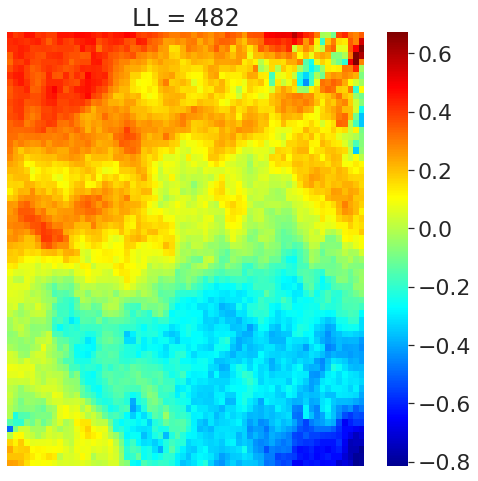

In [48]:
cutout = tbl.iloc[0] 
img= llc_io.grab_image(cutout)

pal, cm = plotting.load_palette()

fig, ax = plt.subplots(1, 1, figsize = (8,8) )

ax = sns.heatmap(ax=ax, data=img, xticklabels=[], yticklabels=[], cmap=cm)
ax.set_title('LL = {}'.format(round(cutout.LL)))

In [36]:
cutout


filename            s3://viirs/data/2012/302/20121028192000-OSPO-L...
row                                                              1680
col                                                              2112
lat                                                          0.365325
lon                                                         -95.01278
clear_fraction                                                   -0.0
field_size                                                        192
datetime                                          2012-10-28 19:20:00
ex_filename         s3://viirs/Extractions/VIIRS_2012_95clear_192x...
pp_file             s3://viirs/PreProc/VIIRS_2012_95clear_192x192_...
pp_root                                                     viirs_std
pp_idx                                                         478870
pp_type                                                             0
mean_temperature                                            22.619648
Tmin                